In [ ]:
from chalk.client import ChalkClient

chalk_client = ChalkClient()

print(chalk_client.whoami())

user='cml1nu9in000c0hs6pdf152ck' environment_id='dmo2ad5trrq3' team_id='dmohscmrcg66'


## Data Prep

In [ ]:
res = chalk_client.query(
    input={"user.id": 2},
    output=[
        "user.denylisted",
        "user.email_age_days",
        "user.name_email_match_score",
        "user.credit_report.percent_past_due",
        "user.count_withdrawals__86400__",
        "user.count_withdrawals__604800__",
        "user.total_spend",
        "user.llm_requires_manual_review",
    ],
)
res

[FeatureResult(field='user.denylisted', value=False, pkey=None, error=None, valid=True, ts=datetime.datetime(2025, 6, 20, 22, 43, 43, tzinfo=datetime.timezone.utc), meta=FeatureResolutionMeta(chosen_resolver_fqn='src.resolvers.email_in_denylist', cache_hit=False, primitive_type="<class 'bool'>", version=1), metadata_val=1219736239295741840), FeatureResult(field='user.email_age_days', value=4719, pkey=None, error=None, valid=True, ts=datetime.datetime(2025, 6, 20, 22, 43, 43, tzinfo=datetime.timezone.utc), meta=FeatureResolutionMeta(chosen_resolver_fqn='src.resolvers.get_emailage_features', cache_hit=False, primitive_type="<class 'int'>", version=1), metadata_val=1209830133924936493), FeatureResult(field='user.name_email_match_score', value=76.92307692307692, pkey=None, error=None, valid=True, ts=datetime.datetime(2025, 6, 20, 22, 43, 43, tzinfo=datetime.timezone.utc), meta=FeatureResolutionMeta(chosen_resolver_fqn='__chalk_underscore__.user_dot_name_email_match_score', cache_hit=False,

,Feature,Value
0,denylisted,False
1,email_age_days,4719
2,name_email_match_score,76.923077
3,percent_past_due,0.0
4,count_withdrawals[1d],0
5,count_withdrawals[7d],0
6,total_spend,0.0
7,llm_requires_manual_review,False


In [ ]:
ds = chalk_client.offline_query(
    input={"user.id": list(range(1, 127))},
    output=[
        "user.id",
        "user.denylisted",
        "user.email_age_days",
        "user.domain_age_days",
        "user.name_email_match_score",
        "user.credit_report.percent_past_due",
        "user.count_withdrawals__86400__",
        "user.count_withdrawals__604800__",
        "user.total_spend",
    ],
    dataset_name="user_fraud_labels",
    wait=True,
)
df = ds.to_pandas()
df

╭────────────────────────────────────────────────── chalk ■ ──────────────────────────────────────────────────╮
│                                                                                                             │
│  The `DatasetRevision` is still being computed. offline_query() will execute once computation is complete.  │
│                                                                                                             │
│  Offline Query completed   0:00:03                                                                          │
│     0:00:00 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0/126 runs [ get_email_age ]                         │
│     0:00:00 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0/252 runs [ get_credit_report ]                     │
│     0:00:00 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0/126 runs [ email_in_denylist ]                     │
│     0:00:00 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0/126 runs [ get_emailage_features ]           

/Users/saibalaji/sandbox-verification/.model-venv/lib/python3.10/site-packages/chalk/client/dataset.py:425: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  decoded_col_names = _decode_column_names(df.columns, col_name_decoder)
/Users/saibalaji/sandbox-verification/.model-venv/lib/python3.10/site-packages/chalk/client/dataset.py:442: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  for c in df.columns:
/Users/saibalaji/sandbox-verification/.model-venv/lib/python3.10/site-packages/chalk/client/dataset.py:446: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive 

,user.id,user.denylisted,user.email_age_days,user.domain_age_days,user.name_email_match_score,user.credit_report.percent_past_due,user.credit_report.id,user.count_withdrawals__86400__,user.count_withdrawals__604800__,user.total_spend
0,1,False,616,10200,75.000000,0.0,123,1,23,26717.86
1,2,False,2101,10200,76.923077,0.0,123,0,0,0.00
2,3,False,3078,10200,66.666667,0.0,123,0,0,0.00
3,4,False,4216,10200,75.000000,0.0,123,0,0,0.00
4,5,False,2826,10200,81.481481,0.0,123,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...
121,122,False,454,10200,87.179487,0.0,123,0,0,0.00
122,123,False,2563,10200,70.588235,0.0,123,0,0,0.00
123,124,False,839,10200,82.758621,0.0,123,0,0,0.00
124,125,False,3212,10200,81.481481,0.0,123,0,0,0.00


In [ ]:
# add the ground truth label (as an approximation)
df["is_fraud_label"] = df["user.denylisted"].apply(lambda x: 1 if x else 0)
df

,user.id,user.denylisted,user.email_age_days,user.domain_age_days,user.name_email_match_score,user.credit_report.percent_past_due,user.credit_report.id,user.count_withdrawals__86400__,user.count_withdrawals__604800__,user.total_spend,is_fraud_label
0,1,False,616,10200,75.000000,0.0,123,1,23,26717.86,0
1,2,False,2101,10200,76.923077,0.0,123,0,0,0.00,0
2,3,False,3078,10200,66.666667,0.0,123,0,0,0.00,0
3,4,False,4216,10200,75.000000,0.0,123,0,0,0.00,0
4,5,False,2826,10200,81.481481,0.0,123,0,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...
121,122,False,454,10200,87.179487,0.0,123,0,0,0.00,0
122,123,False,2563,10200,70.588235,0.0,123,0,0,0.00,0
123,124,False,839,10200,82.758621,0.0,123,0,0,0.00,0
124,125,False,3212,10200,81.481481,0.0,123,0,0,0.00,0


## Training the Model

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

# Assuming your dataframe is called `df`

# Separate features and target
feature_cols = [
    "user.denylisted",
    "user.email_age_days",
    "user.domain_age_days",
    "user.name_email_match_score",
    "user.credit_report.percent_past_due",
    "user.count_withdrawals__86400__",
    "user.count_withdrawals__604800__",
    "user.total_spend",
]

X = df[feature_cols]
y = df["is_fraud_label"]

# Handle missing values (if any)
X = X.fillna(X.median())

# Check class balance
print("Class distribution:")
print(y.value_counts())
print(f"Fraud rate: {y.mean():.2%}")

# Calculate scale_pos_weight for imbalanced classes
fraud_rate = y.mean()
scale_pos_weight = (1 - fraud_rate) / fraud_rate if fraud_rate > 0 else 1
print(f"Scale pos weight: {scale_pos_weight:.2f}")

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Class distribution:
is_fraud_label
0    126
Name: count, dtype: int64
Fraud rate: 0.00%
Scale pos weight: 1.00


[0]	validation_0-auc:nan	validation_1-auc:nan
[10]	validation_0-auc:nan	validation_1-auc:nan
[20]	validation_0-auc:nan	validation_1-auc:nan
[30]	validation_0-auc:nan	validation_1-auc:nan
[40]	validation_0-auc:nan	validation_1-auc:nan
[49]	validation_0-auc:nan	validation_1-auc:nan

EVALUATION METRICS

ROC-AUC Score: nan

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26


Confusion Matrix:
[[26]]

Feature Importance:
                               feature  importance
0                      user.denylisted         0.0
1                  user.email_age_days         0.0
2                 user.domain_age_days         0.0
3          user.name_email_match_score         0.0
4  user.credit_report.percent_past_due         0.0
5      user.count_withdrawals

/Users/saibalaji/sandbox-verification/.model-venv/lib/python3.10/site-packages/xgboost/callback.py:266: UserWarning: [18:43:53] WARNING: /Users/runner/work/xgboost/xgboost/src/metric/auc.cc:324: Dataset is empty, or contains only positive or negative samples.
  score: str = model.eval_set(evals, epoch, self.metric, self._output_margin)
/Users/saibalaji/sandbox-verification/.model-venv/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/Users/saibalaji/sandbox-verification/.model-venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


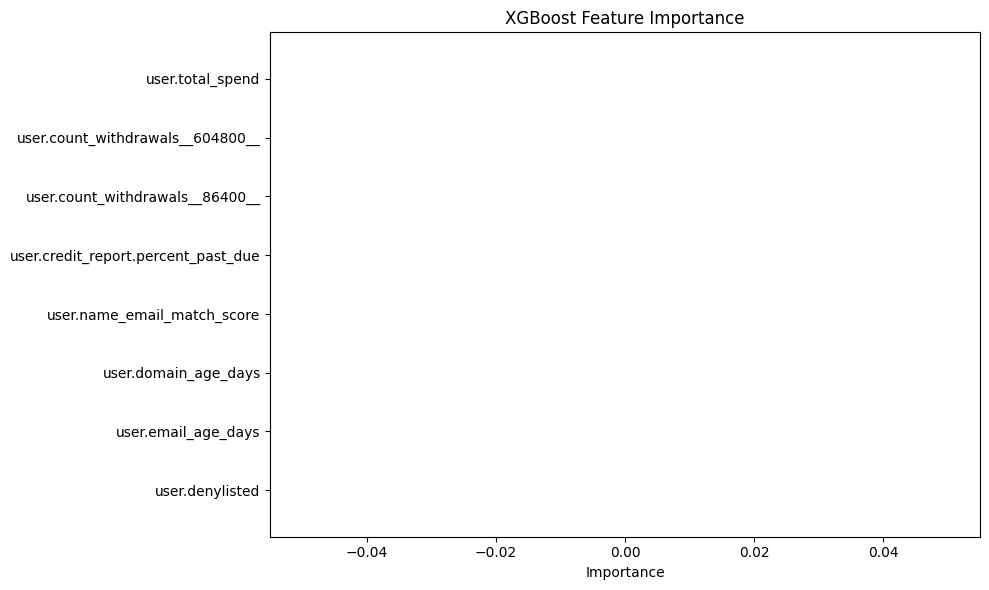

In [ ]:
# XGBoost parameters
params = {
    "max_depth": 3,
    "n_estimators": 50,
    "learning_rate": 0.1,
    "min_child_weight": 5,
    "scale_pos_weight": scale_pos_weight,
    "base_score": 0.5,  # due to class imbalance
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "random_state": 42,
    "tree_method": "hist",  # faster for small models
}

# Train model
model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=10)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("\n" + "=" * 50)
print("EVALUATION METRICS")
print("=" * 50)

print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame(
    {"feature": feature_cols, "importance": model.feature_importances_}
).sort_values("importance", ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["feature"], feature_importance["importance"])
plt.xlabel("Importance")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.savefig("feature_importance.png")
print("\nFeature importance plot saved to 'feature_importance.png'")

# Save model
model.save_model("fraud_model.json")
print("\nModel saved to 'fraud_model.json'")

In [ ]:
## Example Prediction

import pandas as pd

test_row = pd.DataFrame(
    {
        "user.denylisted": [False],
        "user.email_age_days": [30],
        "user.domain_age_days": [365],
        "user.name_email_match_score": [0.85],
        "user.credit_report.percent_past_due": [0.02],
        "user.count_withdrawals__86400__": [2],
        "user.count_withdrawals__604800__": [5],
        "user.total_spend": [1500.50],
    }
)

prediction_proba = model.predict_proba(test_row)[:, 1]
prediction = model.predict(test_row)

print(f"Fraud probability: {prediction_proba[0]:.4f}")
print(f"Prediction: {'FRAUD' if prediction[0] == 1 else 'NOT FRAUD'}")

## Chalk Model Registry

In [ ]:
import pyarrow as pa
from chalk.ml import ModelType, ModelEncoding

# Calculate metrics on test set for metadata
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Register the model
model_version = chalk_client.register_model_version(
    name="fraud_detection_model",
    aliases=["production", "v1"],
    model=model,
    model_type=ModelType.XGBOOST,
    model_encoding=ModelEncoding.PICKLE,
    input_schema=[([1, len(feature_cols)], pa.float64())],
    output_schema=[([1], pa.int64())],
    input_features=feature_cols,
    output_features=["is_fraud"],
    metadata={
        "accuracy": float(accuracy),
        "precision": float(precision),
        "recall": float(recall),
        "f1_score": float(f1),
        "num_features": len(feature_cols),
        "X_train_shape": str(X_train.shape),
        "y_train_shape": str(y_train.shape),
        "X_test_shape": str(X_test.shape),
        "y_test_shape": str(y_test.shape),
        "fraud_rate": float(fraud_rate),
        "scale_pos_weight": float(scale_pos_weight),
    },
)

print(f"Model registered successfully!")

/Users/saibalaji/sandbox-verification/.model-venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saibalaji/sandbox-verification/.model-venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saibalaji/sandbox-verification/.model-venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

Model registered successfully!


AttributeError: 'RegisterModelVersionResponse' object has no attribute 'id'

In [54]:
model_version

RegisterModelVersionResponse(model_id='b5d5e3b6-20c3-4446-9070-0e5e5678a30c', model_name='fraud_detection_model', model_version=1, artifact=id: "9c7c1fe5-5001-4c90-b598-9476e89ece54"
path: "env_dmo2ad5trrq3/artifacts/9c7c1fe5-5001-4c90-b598-9476e89ece54"
spec {
  model_files {
    name: "model.json"
    size_kb: 22
    file_hash: "7\313\311\254\277\226\250\243\234\341$\0276u\351?\251/\315\324RW\316\337\244\tI\037\212\301+\t"
  }
  model_type: MODEL_TYPE_XGBOOST
  model_encoding: MODEL_ENCODING_JSON
  model_signature {
    inputs {
      tensor {
        tensors {
          dtype {
            float64 {
            }
          }
          shape {
            fixed: 1
          }
          shape {
            fixed: 8
          }
        }
      }
    }
    outputs {
      tensor {
        tensors {
          dtype {
            int64 {
            }
          }
          shape {
            fixed: 1
          }
        }
      }
    }
  }
  input_features: "user.denylisted"
  input_feat